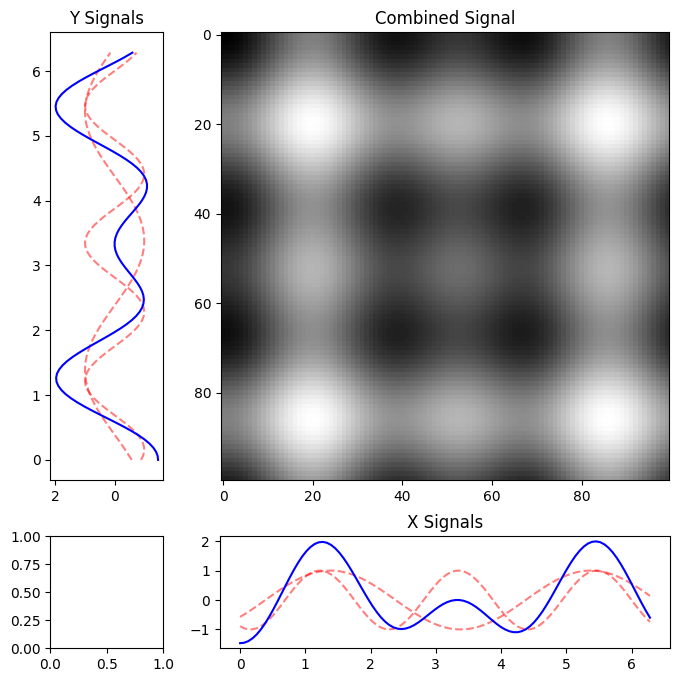

In [136]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import gridspec
import importlib
import src.EINCASMConfig as EINCASMConfig
importlib.reload(EINCASMConfig)

cfg = EINCASMConfig.Config('config.yaml')
cfg.device = torch.device('cpu')

# def generate_signal(freq, period, amplitude, rot, X, Y):
#     return (amplitude * torch.sin(freq * X * torch.cos(rot) - Y * torch.sin(rot) + period) +
#             amplitude * torch.cos(freq * X * torch.sin(rot) + Y * torch.cos(rot) + period))


num_x_signals = 2
num_y_signals = 2
num_signals = num_x_signals + num_y_signals
min_freq, max_freq = 0.2, 3
min_rot, max_rot = 0, np.pi
min_amp, max_amp = 1, 1
min_period, max_period = 0, np.pi*2

freqs = (max_freq - min_freq) * torch.rand(num_signals).to(cfg.device) + min_freq
# rots = (max_rot - min_rot) * torch.rand(num_signals).to(cfg.device) + min_rot
amps = (max_amp - min_amp) * torch.rand(num_signals).to(cfg.device) + min_amp
periods = (max_period - min_period) * torch.rand(num_signals).to(cfg.device) + min_period

width, height = 100, 100
x = torch.linspace(0, np.pi*2, width).to(cfg.device)
y = torch.linspace(0, np.pi*2, height).to(cfg.device)

x_signals = [amps[i] * torch.sin(freqs[i] * x + periods[i]) for i in range(num_x_signals)]
y_signals = [amps[i] * torch.sin(freqs[i] * y + periods[i]) for i in range(num_y_signals)]
x_combined = sum(x_signals)
y_combined = sum(y_signals)

# X, Y = torch.meshgrid(x, y)
# combined_signal = X# * x_combined# + Y * y_combined
X = x_combined.unsqueeze(0).repeat(height, 1)
Y = y_combined.unsqueeze(1).repeat(1, width)
combined_signal = X + Y

gs = gridspec.GridSpec(2, 2, width_ratios=[1, 4], height_ratios=[4, 1])

fig = plt.figure(figsize=(8, 8))
ax_combined = fig.add_subplot(gs[0, 1])
ax_x = fig.add_subplot(gs[1, 1])
ax_y = fig.add_subplot(gs[0, 0])
ax_mini = fig.add_subplot(gs[1, 0])

ax_combined.set_title('Combined Signal')
ax_x.set_title('X Signals')
ax_y.set_title('Y Signals')
# ax_minix4.set_title('X Signals x 4')

# ax_x.set_ylim([-max_amp*len(signals), max_amp*len(signals)])
# ax_y.set_xlim([-max_amp*len(signals), max_amp*len(signals)])

ax_combined.imshow(combined_signal.cpu().numpy(), cmap='gray')

for ix in range(num_x_signals):
    ax_x.plot(x, x_signals[ix], color='red', linestyle='dashed', alpha=0.5)
    
for iy in range(num_y_signals):
    ax_y.plot(y_signals[iy], y, color='red', linestyle='dashed', alpha=0.5)

ax_x.plot(x, x_combined, color='blue')
ax_y.plot(y_combined, y, color='blue')
ax_y.invert_xaxis()



In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x)
y2 = np.cos(x + np.pi / 2)
ax.plot(x, y, label='sin')
ax.plot(x, y2, label='cos')
ax.legend()
